In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# training data
train_df = pd.read_csv('D:/Projects/github/Lecture5/data/clean/train.csv')
X_train = train_df.drop(['Daily_radiation'], axis = 1)
y_train = train_df['Daily_radiation']

# test data
test_df = pd.read_csv('D:/Projects/github/Lecture5/data/clean/test.csv')
X_test = test_df.drop(['Daily_radiation'], axis = 1)
y_test = test_df['Daily_radiation']

In [6]:
steps = [
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
]

# Create the pipeline
pipeline_lr = Pipeline(steps)

# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [7]:
# Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_lr))
print('Mean Squared Error: %.2f' % (mse))

r2_score:  0.9451992012290789
Mean Squared Error: 29.80


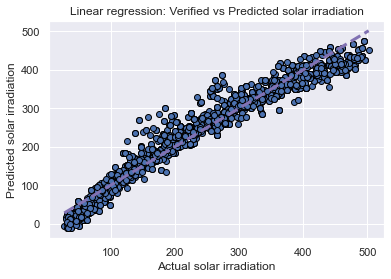

In [8]:
#Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title('Linear regression: Verified vs Predicted solar irradiation')
plt.savefig('notebooks_figures/lr_line_of_fit.jpg')
plt.show()

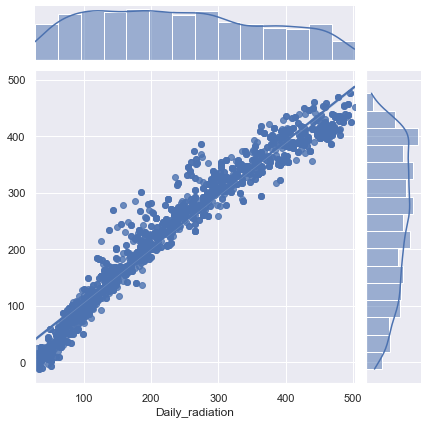

In [9]:
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.savefig('notebooks_figures/lr_jointplot.jpg')
plt.show()

### Random Forest Regressor

In [10]:
# Setup the random forest model: rft
rfr = RandomForestRegressor()

# Fit the pipeline to the train set
rfr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_rfr = rfr.predict(X_test)

# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_rfr))
print('Mean Squared Error: %.2f' % (mse_rf))

r2_score:  0.9999983656096292
Mean Squared Error: 0.16


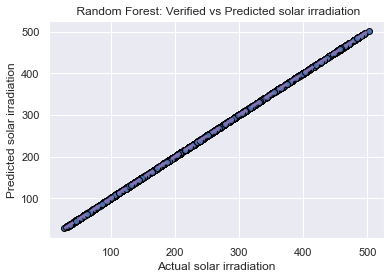

In [11]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(' Random Forest: Verified vs Predicted solar irradiation')
plt.savefig('notebooks_figures/rfr_line_of_fit.jpg')
plt.show()

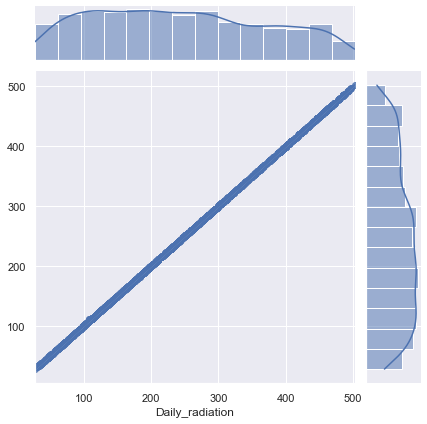

In [12]:
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.savefig('notebooks_figures/rfr_jointplot.jpg')
plt.show()

### Gradient Boosting Regressor

In [13]:
# Setup the gradient boosting model: gbr
gbr = GradientBoostingRegressor()

# Fit the pipeline to the train set
gbr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_gbr = gbr.predict(X_test)

In [14]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_gbr))
print('Mean Squared Error: %.2f' % (mse_gr))

r2_score:  0.9928155500065998
Mean Squared Error: 10.79


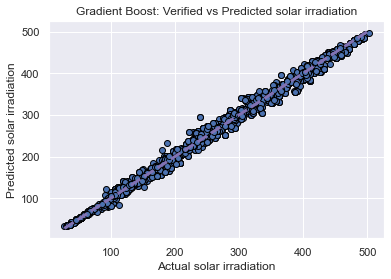

In [15]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title('Gradient Boost: Verified vs Predicted solar irradiation')
plt.savefig('notebooks_figures/gbr_line_of_fit.jpg')
plt.show()

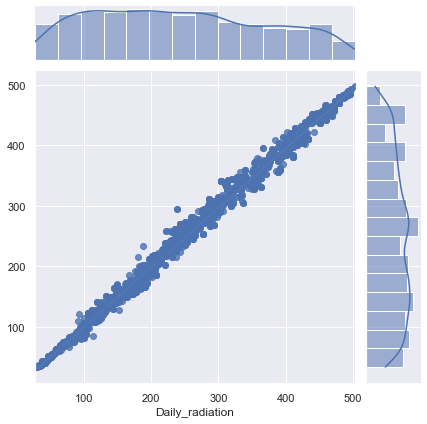

In [16]:
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.savefig('notebooks_figures/gbr_jointplot.jpg')
plt.show()

### Model Validation

In [17]:
# validation data
val_df = pd.read_csv('D:/Projects/github/Lecture5/data/clean/val.csv')
X_val = val_df.drop(['Daily_radiation'], axis=1)
y_val = val_df['Daily_radiation']

In [18]:
# validate models
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = rfr.predict(X_val)
y_val_gbr = gbr.predict(X_val)

In [19]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_lr))
print('Linear Regression - Mean Squared Error: %.2f' % (mse_lr_val))

r2_score:  0.9441342083107535
Linear Regression - Mean Squared Error: 29.95


In [20]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_rfr))
print('Random Forest - Mean Squared Error: %.2f' % (mse_rf_val))

r2_score:  0.9999980006148929
Random Forest - Mean Squared Error: 0.18


In [21]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_gbr))
print('Gradient Boost - Mean Squared Error: %.2f' % (mse_gbr_val))

r2_score:  0.9936006946591026
Gradient Boost - Mean Squared Error: 10.14


### Experiment tracking with Neptune

In [22]:
# import neptune libraries and sklearn integration
import neptune.new as neptune
import neptune.new.integrations.sklearn as npt_utils

In [24]:
run = neptune.init(
    project="u12ce045/omdena-mlops",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJhMTZlNzA3MC02ZTA1LTRhZWYtOGE5ZS02M2MyZjRiZTFiY2MifQ==",
    name='solar-irradiation',
    source_files=["D:/Projects/github/Lecture5/notebooks/model_development.ipynb"]
)

https://app.neptune.ai/u12ce045/omdena-mlops/e/OM-1
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


In [29]:
# Track files, models, and folders
# File
path_to_raw_data = '../data/clean/'
run["raw_datasets"].track_files(path_to_raw_data)

In [30]:
path_to_clean_data = '../data/clean/'
run["cleaned_datasets"].track_files(path_to_clean_data)

In [31]:
# Folder
path_to_notebooks = '../notebooks/'
run["notebooks"].track_files(path_to_notebooks)

Did not log feature importance chart. Error: could not find feature importances param on Pipeline


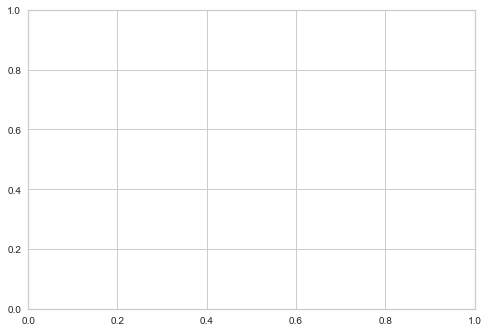

In [32]:
# train, and test; while tracking the experiment
run['lr_summary'] = npt_utils.create_regressor_summary(pipeline_lr, X_train, X_test, y_train, y_test)
run['gbr_summary'] = npt_utils.create_regressor_summary(gbr, X_train, X_test, y_train, y_test)
run['rfr_summary'] = npt_utils.create_regressor_summary(rfr, X_train, X_test, y_train, y_test)

In [33]:
# stop experiment
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 4 operations to synchronize with Neptune. Do not kill this process.


All 4 operations synced, thanks for waiting!


### Experiment tracking with Mlflow

In [34]:
# import libraries
import mlflow
import mlflow.sklearn

In [35]:
# model metrics for linear regression
mse_lr_pred = mean_squared_error(y_test, y_pred_lr, squared = False)
R2_score_lr = r2_score(y_test, y_pred_lr)

# model metrics for random forest
mse_rfr_pred = mean_squared_error(y_test, y_pred_rfr, squared = False)
R2_score_rfr = r2_score(y_test, y_pred_rfr)

# model metrics for gradient boost
mse_gbr_pred = mean_squared_error(y_test, y_pred_gbr, squared = False)
R2_score_gbr = r2_score(y_test, y_pred_gbr)

In [37]:
# set the tracking uri
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
experiment = mlflow.get_experiment('0')

In [38]:
print("Name of experiment: {}".format(experiment.name))
print("Location of Artifact: {}".format(experiment.artifact_location))
print("Life cycle phase: {}".format(experiment.lifecycle_stage))
print("Experiment_ID: {}".format(experiment.experiment_id))

Name of experiment: Default
Location of Artifact: ./mlruns/0
Life cycle phase: active
Experiment_ID: 0


In [39]:
# start experiment tracking
run = mlflow.start_run(run_name = 'solar_irradiation')
run_id = run.info.run_id

In [40]:
# Log mlflow attributes for mlflow UI
# log metrics for linear regression
mlflow.log_metric("rmse_lr", mse_lr_pred)
mlflow.log_metric("r2_score_lr", R2_score_lr)

# log metrics for random forest
mlflow.log_metric("rmse_rfr", mse_rfr_pred)
mlflow.log_metric("r2_score_rfr", R2_score_rfr)

# log metrics for gradientboost
mlflow.log_metric("rmse_gbr", mse_gbr_pred)
mlflow.log_metric("r2_score_gbr", R2_score_gbr)

In [43]:
# log models experiments
artifact_path = "default"
mlflow.sklearn.log_model(pipeline_lr, artifact_path = artifact_path, registered_model_name = "linear-regression-model")
mlflow.sklearn.log_model(rfr, artifact_path = artifact_path, registered_model_name = "sklearn-random-forest-model")
mlflow.sklearn.log_model(gbr, artifact_path = artifact_path, registered_model_name = "sklearn-gradientboost-model")

RestException: INVALID_PARAMETER_VALUE:  Model registry functionality is unavailable; got unsupported URI './mlruns' for model registry data storage. Supported URI schemes are: ['postgresql', 'mysql', 'sqlite', 'mssql']. See https://www.mlflow.org/docs/latest/tracking.html#storage for how to run an MLflow server against one of the supported backend storage locations.

In [44]:
# Log artifacts (output files)
mlflow.log_artifact("notebooks_figures/lr_line_of_fit.jpg", artifact_path = 'features')

# Log Features
mlflow.log_artifact('../data/clean/train.csv', artifact_path = 'features')

In [45]:
# End tracking
mlflow.end_run()

In [46]:
# enable auto logging
mlflow.sklearn.autolog(log_models = True)

2022/01/10 21:29:53 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


In [47]:
with mlflow.start_run(experiment_id = experiment.experiment_id, run_name = 'auto_lr_model') as run:
    pipeline_lr.fit(X_train,
                      y_train)
    y_pred_lr = pipeline_lr.predict(X_test)
    rfr.fit(X_train,
            y_train)
    y_pred_rfr = rfr.predict(X_test)
    gbr.fit(X_train,
            y_train)
    y_pred_gbr = gbr.predict(X_test)

2022/01/10 21:31:06 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID e8075ed5b529439fbfaba3a751eac512. Failed operations: [MlflowException("API request to http://127.0.0.1:5000/api/2.0/mlflow/runs/log-batch failed with exception HTTPConnectionPool(host=\'127.0.0.1\', port=5000): Max retries exceeded with url: /api/2.0/mlflow/runs/log-batch (Caused by ResponseError(\'too many 500 error responses\'))")]')]
2022/01/10 21:32:07 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: The following failures occurred while performing one or more logging operations: [MlflowException('Failed to perform one or more operations on the run with ID e8075ed5b529439fbfaba3a751eac512. Failed operations: [MlflowException("API request to http://127.0.0.1:5000/a

In [48]:
# End tracking
mlflow.end_run()

### Export Models

In [49]:
# loading libraries
import joblib

# Save Models to file in the model directory
# save linear regression model
joblib_lr = "../ml_models/model_lr.pkl"  
joblib.dump(pipeline_lr, joblib_lr)
# save random forest model
joblib_rfr = "../ml_models/model_rfr.pkl" 
joblib.dump(rfr, joblib_rfr)
# save gradientboost model
joblib_gbr = "../ml_models/model_gbr.pkl"  
joblib.dump(gbr, joblib_gbr)

['../ml_models/model_gbr.pkl']